## Vamo a importar los datos

In [1]:
import numpy as np
import pandas as pd
temp = pd.read_csv('nodo2_periodo3.csv')#,parse_dates=True,index_col=0)

In [2]:
temp.head()

,Unnamed: 0,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
0,2018-06-05 14:41:00,6.11,16.0,5841.0,34.0
1,2018-06-05 14:42:00,6.11,16.0,5847.0,34.0
2,2018-06-05 14:43:00,6.11,16.0,5841.0,34.0
3,2018-06-05 14:44:00,5.95,16.0,5841.0,34.0
4,2018-06-05 14:45:00,5.95,16.0,5841.0,34.0


In [3]:
yt = temp.iloc[:,4]
display(yt.head())
display(yt.tail())

0    34.0
1    34.0
2    34.0
3    34.0
4    34.0
Name: TEMPERATURA, dtype: float64

4554    26.0
4555    26.0
4556    26.0
4557    26.0
4558    26.0
Name: TEMPERATURA, dtype: float64

In [4]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
x_pacf = pacf(yt, nlags=30, method='ols')
plt.plot(x_pacf)
plt.plot(len(x_pacf)*[0],'--')
plt.title(' Partial autocorrelation function for Monthly Sunspots')

Text(0.5,1,' Partial autocorrelation function for Monthly Sunspots')

For our model we use 5 time lags of the data.

In [5]:
yt_1=yt.shift(1)
yt_2=yt.shift(2)
yt_3=yt.shift(3)
yt_4=yt.shift(4)
yt_5=yt.shift(5)

In [6]:
data = pd.concat([yt,yt_1,yt_2,yt_3,yt_4,yt_5],axis =1)
data.columns = ['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
display(data.head(6))
display(data.tail(6))

,yt,yt_1,yt_2,yt_3,yt_4,yt_5
0,34.0,NaN,NaN,NaN,NaN,NaN
1,34.0,34.0,NaN,NaN,NaN,NaN
2,34.0,34.0,34.0,NaN,NaN,NaN
3,34.0,34.0,34.0,34.0,NaN,NaN
4,34.0,34.0,34.0,34.0,34.0,NaN
5,34.0,34.0,34.0,34.0,34.0,34.0


,yt,yt_1,yt_2,yt_3,yt_4,yt_5
4553,26.0,26.0,26.0,26.0,26.0,26.0
4554,26.0,26.0,26.0,26.0,26.0,26.0
4555,26.0,26.0,26.0,26.0,26.0,26.0
4556,26.0,26.0,26.0,26.0,26.0,26.0
4557,26.0,26.0,26.0,26.0,26.0,26.0
4558,26.0,26.0,26.0,26.0,26.0,26.0


In [7]:
data = data.dropna()
y = data['yt']
cols = ['yt_1','yt_2','yt_3','yt_4','yt_5']
print(cols)
x = data[cols]
display(y.head())
display(y.tail())
display(x.head())
display(x.tail())

['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']


5    34.0
6    34.0
7    34.0
8    34.0
9    34.0
Name: yt, dtype: float64

4554    26.0
4555    26.0
4556    26.0
4557    26.0
4558    26.0
Name: yt, dtype: float64

,yt_1,yt_2,yt_3,yt_4,yt_5
5,34.0,34.0,34.0,34.0,34.0
6,34.0,34.0,34.0,34.0,34.0
7,34.0,34.0,34.0,34.0,34.0
8,34.0,34.0,34.0,34.0,34.0
9,34.0,34.0,34.0,34.0,34.0


,yt_1,yt_2,yt_3,yt_4,yt_5
4554,26.0,26.0,26.0,26.0,26.0
4555,26.0,26.0,26.0,26.0,26.0
4556,26.0,26.0,26.0,26.0,26.0
4557,26.0,26.0,26.0,26.0,26.0
4558,26.0,26.0,26.0,26.0,26.0


## Vamo a normalizar los datos

In [8]:
from sklearn import preprocessing
# scaler para x
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [9]:
# 5 columnas
x = np.array(x).reshape((len(x),5))
x = scaler.fit_transform(x)

In [10]:
# scaler para y
scaler_y = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = np.array(y).reshape((len(y),1))
y = scaler_y.fit_transform(y)

# Train and Test Sets

In [11]:
train_end = int(len(y)*.8)
x_train = x[0:train_end,]
x_test = x[train_end+1:len(y),]
y_train = y[0:train_end]
y_test = y[train_end+1:len(y)]
x_train = x_train.reshape(x_train.shape+(1,))
x_test = x_test.reshape(x_test.shape+(1,))
# Set de validación
y_valid = y_train [train_end-50:train_end]
x_valid = x_train [train_end-50:train_end]

print('Shape of x_train is ', x_train.shape)
print('Shape of x_test is ', x_test.shape)

Shape of x_train is  (3643, 5, 1)
Shape of x_test is  (910, 5, 1)


In [12]:
# importa el modelo secuencial, permite apilar capas de manera lineal
from keras.models import Sequential
# importa la capa densa, esta es una capa de red neuronal completamente conectada regular
# con una función lineal de activación
from keras.layers import Dense, Activation
# Optimizador de descenso de gradiente estocástico
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
#import numpy as np

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Vamo a definir el modelo

In [13]:
# define una semilla para tener resultados repetibles
seed = 1161180
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(LSTM(units=4,activation='relu',
              recurrent_activation='hard_sigmoid',
              input_shape=(5,1)))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(units=1, activation='linear'))

In [14]:
# Define el modelo secuencial
fit2 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit2.add(LSTM(units=4,activation='relu',
              recurrent_activation='hard_sigmoid',
              input_shape=(5,1)))
#Agrega una capa densa con una slida y activación lineal
fit2.add(Dense(units=1, activation='linear'))

In [15]:
fit1.compile(loss='mean_squared_error', optimizer='adam')
#Ajustar el modelo
history1 = fit1.fit(x_train, y_train, batch_size = 1,epochs=10,
                    validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=100,
                                              verbose=2,mode='auto')])

Train on 3643 samples, validate on 50 samples
Epoch 1/10
3643/3643 [==============================] - 16s 4ms/step - loss: 0.0053 - val_loss: 7.4020e-04
Epoch 2/10
3643/3643 [==============================] - 14s 4ms/step - loss: 0.0021 - val_loss: 7.7290e-04
Epoch 3/10
3643/3643 [==============================] - 14s 4ms/step - loss: 0.0020 - val_loss: 7.2769e-04
Epoch 4/10
3643/3643 [==============================] - 16s 4ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 5/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0019 - val_loss: 6.8490e-04
Epoch 6/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0019 - val_loss: 6.6450e-04
Epoch 7/10
3643/3643 [==============================] - 16s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0018 - val_loss: 6.2313e-04
Epoch 9/10
3643/3643 [==============================] - 16s 4ms/step - loss: 0.0018 - val_loss: 0.0026
Epo

In [16]:
fit2.compile(loss='mean_squared_error', optimizer='adam')
#Ajustar el modelo
history2 = fit2.fit(x_train, y_train, batch_size = 1, epochs=10, shuffle=True,
                    validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=100,
                                              verbose=2,mode='auto')])

Train on 3643 samples, validate on 50 samples
Epoch 1/10
3643/3643 [==============================] - 21s 6ms/step - loss: 0.0108 - val_loss: 8.7060e-04
Epoch 2/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0022 - val_loss: 9.2097e-04
Epoch 3/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0020 - val_loss: 6.5739e-04
Epoch 4/10
3643/3643 [==============================] - 14s 4ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 5/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0019 - val_loss: 6.1853e-04
Epoch 6/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0018 - val_loss: 6.7722e-04
Epoch 7/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0018 - val_loss: 6.0776e-04
Epoch 8/10
3643/3643 [==============================] - 14s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0018 - val_loss: 5.7854e-04

In [17]:
fit3 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit3.add(LSTM(units=4,stateful=True,batch_input_shape=(1,5,1),activation='relu',
              recurrent_activation ='hard_sigmoid'))
fit3.add(Dense(units=1,activation='linear'))
fit3.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
fit4 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit4.add(LSTM(units=4,stateful=True,batch_input_shape=(1,5,1),activation='relu',
              recurrent_activation ='hard_sigmoid'))
fit4.add(Dense(units=1,activation='linear'))
fit4.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
end_point =len(x_train)
start_point =end_point - 50

#The model has to be trained one epoch at a time with the
#state reset after each epoch

history3=[]
for i in range(len(x_train[start_point:end_point])):
    history3.append(fit3.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,shuffle=False,validation_data=(x_valid,y_valid),
                             callbacks =[EarlyStopping(monitor ='val_loss',patience=100,
                                                       verbose=2,mode='auto')]))
    fit3.reset_states()
    
history4=[]
for i in range(len(x_train[start_point:end_point])):
    history4.append(fit4.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,shuffle=True, validation_data=(x_valid,y_valid),
                             callbacks =[EarlyStopping(monitor ='val_loss',patience=100,
                                                       verbose=2,mode='auto')]))
    fit4.reset_states()

Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 1s 23ms/step - loss: 0.0116 - val_loss: 9.2685e-04
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0017
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0021
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0023
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0024
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0025
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0025
Train on

50/50 [==============================] - 0s 4ms/step - loss: 0.2351 - val_loss: 1.4226
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 0.8866 - val_loss: 1.8311
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.5922 - val_loss: 0.8915
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 0.3311 - val_loss: 0.4303
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.1928 - val_loss: 0.2423
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.1603 - val_loss: 0.1443
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.0793
Train on 50 samples, validate on 50 samples
Epoch 1/1
50/50 [======

In [20]:
from keras.layers.recurrent import GRU

fit5 = Sequential ()
#return_sequeinces=False para trabajar con una sola objetivo
#Para trabajar con varios objetivos se deja en True
fit5.add(GRU(units=4,return_sequences= False,activation='relu',
             recurrent_activation='hard_sigmoid',input_shape=(5,1)))
fit5.add(Dense(units=1,activation='linear'))
fit5.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
history5 = fit5.fit(x_train,y_train,batch_size=1,epochs=10, validation_data=(x_valid,y_valid),
                    callbacks =[EarlyStopping(monitor ='val_loss',patience=100,
                                              verbose=2,mode='auto')])

Train on 3643 samples, validate on 50 samples
Epoch 1/10
3643/3643 [==============================] - 15s 4ms/step - loss: 0.0178 - val_loss: 0.0011
Epoch 2/10
3643/3643 [==============================] - 14s 4ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 3/10
3643/3643 [==============================] - 13s 4ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 4/10
3643/3643 [==============================] - 10s 3ms/step - loss: 0.0021 - val_loss: 7.3521e-04
Epoch 5/10
3643/3643 [==============================] - 12s 3ms/step - loss: 0.0019 - val_loss: 7.0696e-04
Epoch 6/10
3643/3643 [==============================] - 12s 3ms/step - loss: 0.0018 - val_loss: 8.2544e-04
Epoch 7/10
3643/3643 [==============================] - 12s 3ms/step - loss: 0.0017 - val_loss: 9.1913e-04
Epoch 8/10
3643/3643 [==============================] - 12s 3ms/step - loss: 0.0016 - val_loss: 7.9250e-04
Epoch 9/10
3643/3643 [==============================] - 13s 4ms/step - loss: 0.0016 - val_loss: 6.6126e-04
Epo

the
model will forecast the next month based on the last 500 rolling
months of data:

The larger the batch size, the more memory you
will need to run the model

In [23]:
display(fit1.summary())
display(fit2.summary())
display(fit3.summary())
display(fit4.summary())
display(fit5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_3 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_4 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


None

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 4)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


None

# Evaluar el modelo
Train and Test MSE


In [24]:
score_train1 = fit1.evaluate(x_train, y_train, batch_size=1)
score_test1 = fit1.evaluate(x_test, y_test, batch_size=1)

print('in train2 MSE = ', round(score_train1,4))
print('in test2 MSE = ', round( score_test1 ,4))

score_train2 = fit2.evaluate(x_train, y_train, batch_size=1)
score_test2 = fit2.evaluate(x_test, y_test, batch_size=1)

print('in train2 MSE = ', round(score_train2,4))
print('in test2 MSE = ', round( score_test2 ,4))

score_train3 = fit3.evaluate(x_train, y_train, batch_size=1)
score_test3 = fit3.evaluate(x_test, y_test, batch_size=1)

print('in train3 MSE = ', round(score_train3,4))
print('in test3 MSE = ', round( score_test3,4))

score_train4 = fit4.evaluate(x_train, y_train, batch_size=1)
score_test4 = fit4.evaluate(x_test, y_test, batch_size=1)

print('in train4 MSE = ', round(score_train4,4))
print('in test4 MSE = ', round( score_test4,4))

score_train5 = fit5.evaluate(x_train, y_train, batch_size=1)
score_test5 = fit5.evaluate(x_test, y_test, batch_size=1)

print('in train5 MSE = ', round(score_train5,4))
print('in test5 MSE = ', round( score_test5,4))

910/910 [==============================] - 1s 993us/step
in train2 MSE =  0.0016
in test2 MSE =  0.002
910/910 [==============================] - 1s 715us/step
in train2 MSE =  0.0015
in test2 MSE =  0.0018
910/910 [==============================] - 1s 673us/step
in train3 MSE =  0.0422
in test3 MSE =  0.0263
910/910 [==============================] - 1s 677us/step
in train4 MSE =  0.4893
in test4 MSE =  0.6053
910/910 [==============================] - 1s 860us/step
in train5 MSE =  0.0014
in test5 MSE =  0.0017


And to convert the predictions back to their original scale,
so we can view them individually:

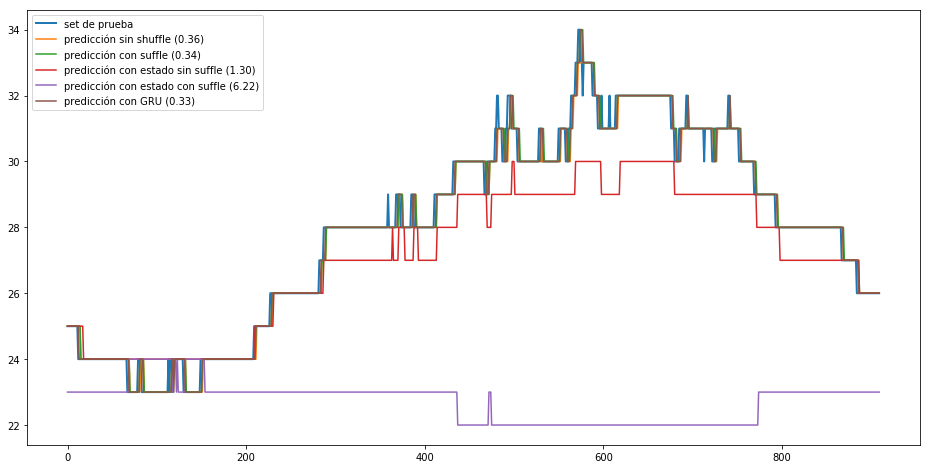

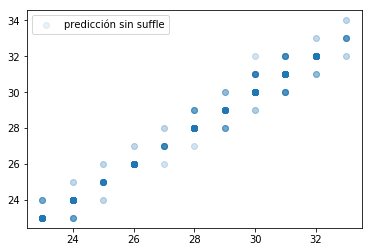

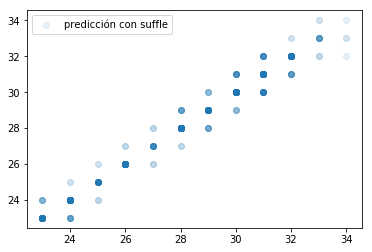

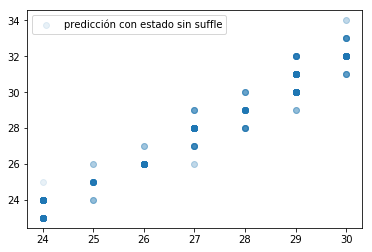

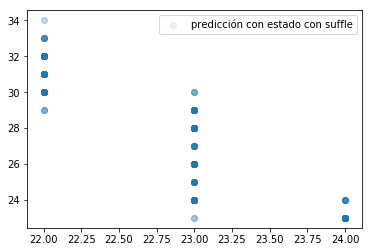

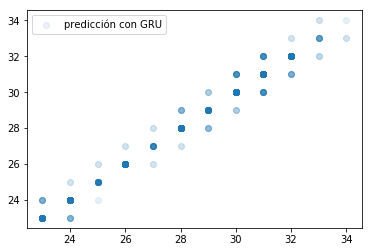

In [25]:
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

entreno = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))
plt.figure(figsize=[16,8])
plt.plot(np.rint(entreno),label='set de prueba',linewidth=2)

pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))

# Difrerenca entre rms y rmse
# Se calcula el error rms

p1 = math.sqrt(mean_squared_error(pred1, entreno))
#RSME idntefica los grandes errores
#RSM identifica la variación de disftribución de frecuencias
#https://translate.googleusercontent.com/translate_c?depth=1&hl=es&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d&xid=17259,15700023,15700186,15700191,15700248&usg=ALkJrhipwo7TP2PruqpEsfcKMCIVIjSq4Q

plt.plot(np.rint(pred1),label='predicción sin shuffle (%.2f)'%p1)

pred2 = fit2.predict(x_test)
pred2 = scaler_y.inverse_transform(np.array(pred2).reshape((len(pred2),1)))

p2 = math.sqrt(mean_squared_error(pred2, entreno))

plt.plot(np.rint(pred2),label='predicción con suffle (%.2f)'%p2)

pred3 = fit3.predict(x_test,batch_size=1)
pred3 = scaler_y.inverse_transform(np.array(pred3).reshape((len(pred3),1)))

p3 = math.sqrt(mean_squared_error(pred3, entreno))

plt.plot(np.rint(pred3),label='predicción con estado sin suffle (%.2f)'%p3)

pred4 = fit4.predict(x_test,batch_size=1)
pred4 = scaler_y.inverse_transform(np.array(pred4).reshape((len(pred4),1)))

p4 = math.sqrt(mean_squared_error(pred4, entreno))

plt.plot(np.rint(pred4),label='predicción con estado con suffle (%.2f)'%p4)

pred5 = fit5.predict(x_test)
pred5 = scaler_y.inverse_transform(np.array(pred5).reshape((len(pred5),1)))

p5 = math.sqrt(mean_squared_error(pred5, entreno))

plt.plot(np.rint(pred5),label='predicción con GRU (%.2f)'%p5)

plt.legend()


plt.figure()
plt.scatter(np.rint(pred1),np.rint(entreno),alpha=.1,label='predicción sin suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred2),np.rint(entreno),alpha=.1,label='predicción con suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred3),np.rint(entreno),alpha=.1,label='predicción con estado sin suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred4),np.rint(entreno),alpha=.1,label='predicción con estado con suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred5),np.rint(entreno),alpha=.1,label='predicción con GRU')
plt.legend()

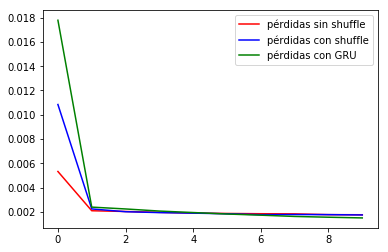

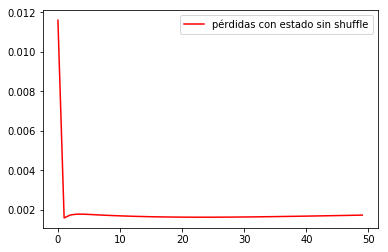

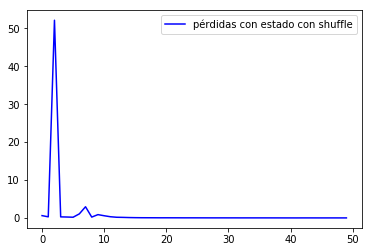

In [26]:
plt.plot(history1.history['loss'], 'r', label='pérdidas sin shuffle')
plt.plot(history2.history['loss'], 'b', label='pérdidas con shuffle')
plt.plot(history5.history['loss'], 'g', label='pérdidas con GRU')
plt.legend()

plt.figure()
h3 = [x.history['loss'] for x in history3]
plt.plot(h3, 'r', label='pérdidas con estado sin shuffle')
plt.legend()

plt.figure()
h4 = [x.history['loss'] for x in history4]
plt.plot(h4, 'b', label='pérdidas con estado con shuffle')
plt.legend()

In [27]:
fit2.save('lstms.h5')
fit1.save('lstm.h5')
fit5.save('grus.h5')
from sklearn.externals import joblib 
joblib.dump(scaler_y, 'scaler.save')

['scaler.save']